# Distance, assortativity and random walks
- Vítor Amorim Fróis

In [ ]:
import math

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from scipy.stats import pearsonr, spearmanr

### Shortest Paths Matrix

In [3]:
def get_shortest_paths_list(G: nx.Graph) -> list[int]:
    shortest_paths_list = []
    node_list = list(G.nodes)
    for i in tqdm(node_list):
        for j in node_list:
            if i < j:
                shortest_paths_list.append(
                    len(nx.shortest_path(usairport, i, j)) - 1
                )
    return shortest_paths_list

### Degree Distribution

In [4]:
def get_degree_distribution(degree_list):
    hist, bins = np.histogram(
        degree_list, 
        bins=max(degree_list) - min(degree_list),
        density=True
    )
    return dict(zip(bins[:-1], hist))

### Shannon Entropy

In [5]:
get_shannon_entropy = lambda x: np.sum([-x[k]*math.log(x[k], 2) if x[k] > 0 else 0 for k in x])

### Assortativity

In [66]:
def get_assortativity(G: nx.Graph) -> tuple[float, float]:
    node_degree = [i[1] for i in sorted(dict(nx.degree(G)).items(), key=lambda k: int(k[0]))]
    average_neighbor_degree = [i[1] for i in sorted(nx.average_neighbor_degree(G).items(), key=lambda k: int(k[0]))]
    return pearsonr(node_degree, average_neighbor_degree)

**Question 1:** compute Average Shortest Path Lenght and Diameter. Use only biggest connected component and remove loops 

In [6]:
hamster_raw = nx.read_edgelist('data/hamsterster.txt')
hamster_raw.remove_edges_from(nx.selfloop_edges(hamster_raw))
hamster_raw = hamster_raw.to_undirected()
components_list = sorted(nx.connected_components(hamster_raw), key=len, reverse=True)
hamster = hamster_raw.subgraph(components_list[0])

In [7]:
avg_shortest_path = nx.average_shortest_path_length(hamster)
diameter = nx.diameter(hamster)

In [8]:
print(f'Average SPL = {avg_shortest_path}; Diameter = {diameter}')

Average SPL = 3.452640184078649; Diameter = 14


In [9]:
nx.degree_assortativity_coefficient(hamster)

-0.08892633705473978

**Question 2:** Mean and variance of SPL in the USAirport500 Network

In [10]:
usairport_raw = nx.read_weighted_edgelist("data/USairport500.txt")
components_list = sorted(nx.connected_components(usairport_raw), key=len, reverse=True)
usairport = usairport_raw.subgraph(components_list[0])
shortest_paths_list = get_shortest_paths_list(usairport)
avg_shortest_path = np.mean(shortest_paths_list)
variance_shortest_path = np.var(shortest_paths_list)
print(f'Average SPL = {avg_shortest_path}; Var SPL = {variance_shortest_path}')

100%|██████████| 500/500 [00:05<00:00, 90.79it/s] 

Average SPL = 2.9910300601202406; Var SPL = 0.8175467946875716


**Question 3:** USAirport500 SPL Shannon Entropy

In [11]:
spl_distribution = get_degree_distribution(shortest_paths_list)
shannon_entropy = get_shannon_entropy(spl_distribution)
print(f'SPL Shannon Entropy = {shannon_entropy}')

SPL Shannon Entropy = 1.8830186387901517


**Question 4:** Advogato Assortativity

In [12]:
advogato_raw = nx.read_weighted_edgelist("data/advogato.txt")
components_list = sorted(nx.connected_components(advogato_raw), key=len, reverse=True)
advogato = advogato_raw.subgraph(components_list[0])

In [13]:
assortativity = nx.degree_assortativity_coefficient(advogato)
print(f'Advogato Assortativity = {assortativity}')

Advogato Assortativity = -0.08455192594199314


**Question 5:** Pearson Correlation between knn(k) and k

In [68]:
word_adjacencies_raw = nx.read_weighted_edgelist("data/word_adjacencies.txt")
components_list = sorted(nx.connected_components(word_adjacencies_raw), key=len, reverse=True)
word_adjacencies = word_adjacencies_raw.subgraph(components_list[0])

In [69]:
assortativity, pvalue = get_assortativity(word_adjacencies)
print(f'Word Assortativity = {assortativity}')

Word Assortativity = -0.15805416917978068


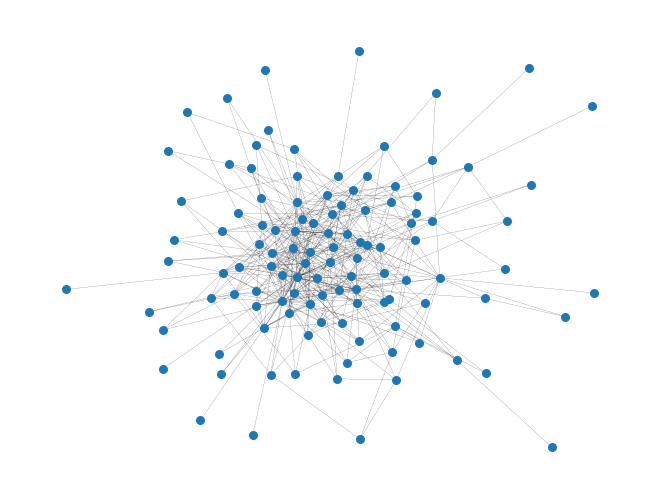

In [77]:
nx.draw(word_adjacencies, node_size=30, width=0.1)